In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
# magic function

In [3]:
import numpy as np
import healpy as hp

In [5]:
NSIDE = 32
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

#NSIDE defines the resolution of the map, usually a power of 2

Approximate resolution at NSIDE 32 is 1.8 deg


In [6]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

#NPIX gives the number of pixels of the map

12288


TypeError: You must first set_array for mappable

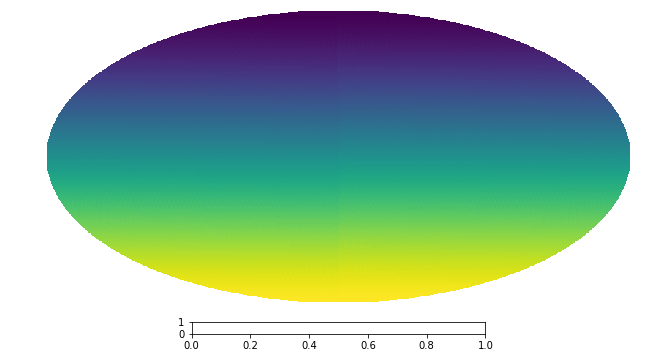

In [8]:
m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()

#RING configuration of the ordering of pixels 
#graticule provides the grid lines, however doesnt work at the moment.
#RING ordering is needed for the spherical harmonic transforms.

In [9]:
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
print(vec)

#representing the standard coordinates (colattitude theta and longitude phi) as a vector

[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


In [11]:
ipix_disc = hp.query_disc(nside=32, vec=vec, radius=np.radians(10))

#finds the indicies of all pixels within 10 degrees of the defined vector point
#and changes the value of the map at that location 

TypeError: You must first set_array for mappable

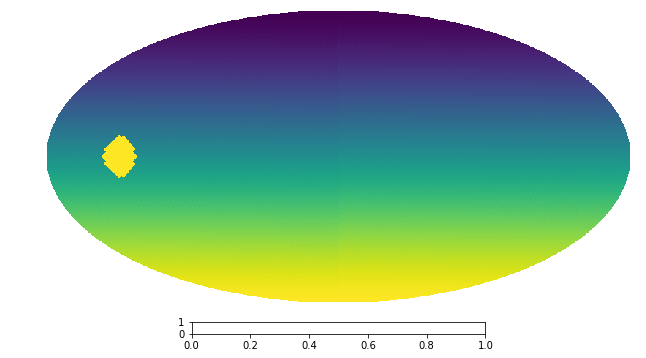

In [8]:
m = np.arange(NPIX)
m[ipix_disc] = m.max()
hp.mollview(m, title="Mollview image RING")

In [13]:
theta, phi = np.degrees(hp.pix2ang(nside=32, ipix=[0, 1, 2, 3, 4]))

#pix2ang retrieves the colattitude and longtidue of each pixel

In [14]:
theta

array([1.46197116, 1.46197116, 1.46197116, 1.46197116, 2.92418036])

In [15]:
phi

array([ 45. , 135. , 225. , 315. ,  22.5])

TypeError: You must first set_array for mappable

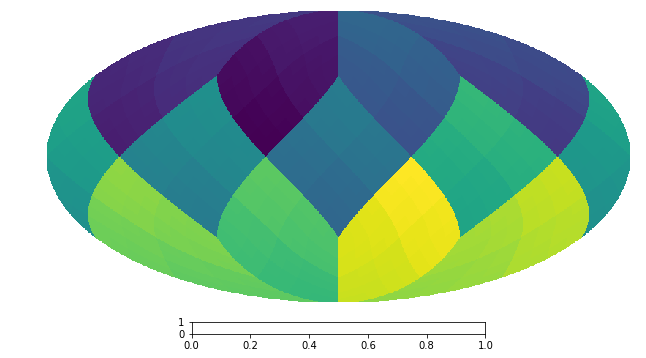

In [16]:
m = np.arange(NPIX)
hp.mollview(m, nest=True, title="Mollview image Nested")

#NESTED ordering is an efficient way for map operations 
#All healpy routines assume RING ordering, hence why 'nest=True' is required 
#for a NESTED ordering

In [15]:
!wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits;wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits

--2021-07-21 12:55:15--  http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 129.164.179.68, 2001:4d0:2310:150::68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits [following]
--2021-07-21 12:55:15--  https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2021-07-21 12:55:16--  http://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.go

In [17]:
wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")

#retrieves the WMAP data into current directory

In [19]:
hp.write_map("my_map.fits", wmap_map_I, overwrite=True)

setting the output map dtype to [dtype('>f4')]


TypeError: You must first set_array for mappable

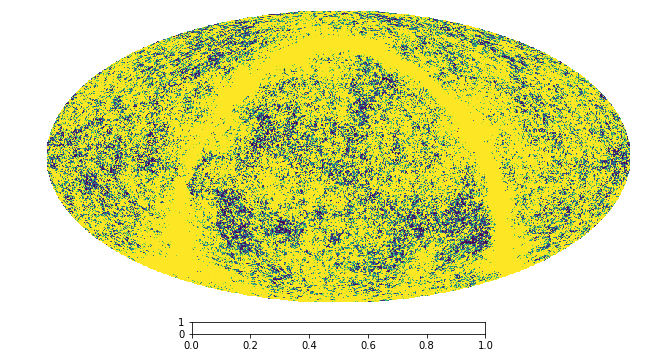

In [20]:
hp.mollview(
    wmap_map_I,
    coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    min=-1,
    max=0,
)
hp.graticule()



TypeError: You must first set_array for mappable

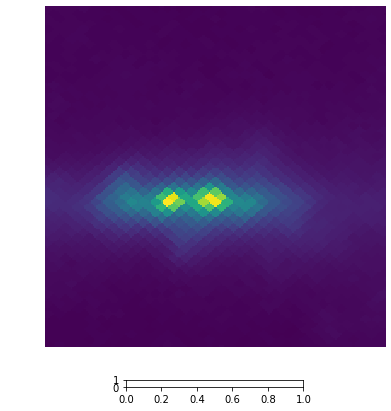

In [20]:
hp.gnomview(wmap_map_I, rot=[0, 0.3], title="GnomView", unit="mK", format="%.2g")

#gnomview provieds a gnomonic projection around location specified by rot
#x/ysize changes dimensions of the patch of sky observed

#what does the format argument do??

In [21]:
mask = hp.read_map("wmap_temperature_analysis_mask_r9_7yr_v4.fits").astype(np.bool_)
wmap_map_I_masked = hp.ma(wmap_map_I)
wmap_map_I_masked.mask = np.logical_not(mask)

#adds the temperature mask to the map, by convention the mask is 0 where
#the data are masked.
#Filling the masked array fills in the unseen values and returns a standard
#array that can be used as a mollweide projection

TypeError: You must first set_array for mappable

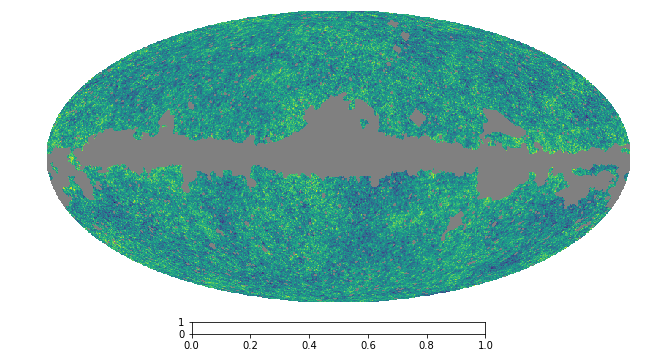

In [25]:
hp.mollview(wmap_map_I_masked.filled())


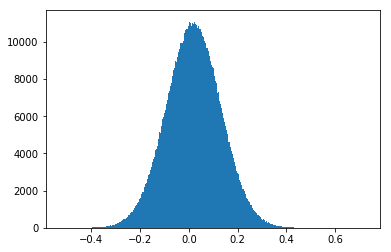

In [26]:
plt.hist(wmap_map_I_masked.compressed(), bins=1000);

#compressed() removes the masked pixels and returns a standard array that can
#be used by matplotlib as a histogram function

In [28]:
LMAX = 1024
cl = hp.anafast(wmap_map_I_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))

#hp.anafast is a nice tool for computing angular power spectra from maps

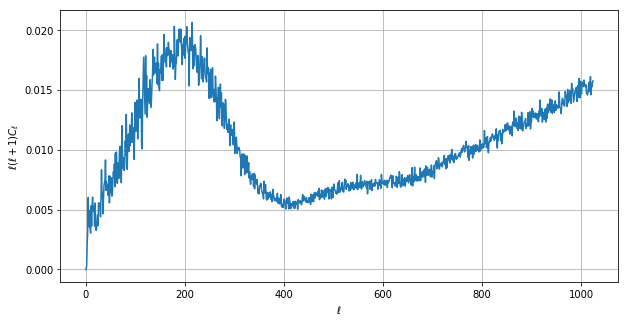

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell+1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

#plots a normalised CMB spectrum and writes the file to disk

TypeError: You must first set_array for mappable

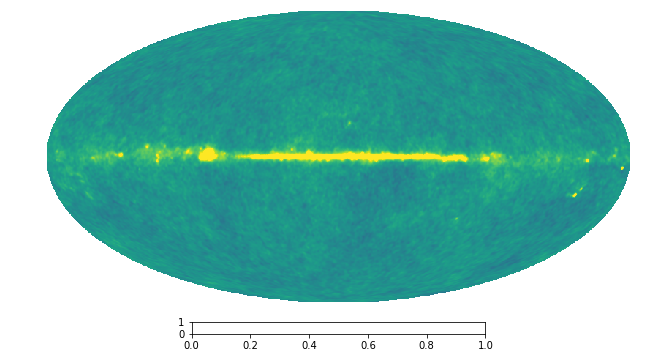

In [30]:
wmap_map_I_smoothed = hp.smoothing(wmap_map_I, fwhm=np.radians(1.))
hp.mollview(wmap_map_I_smoothed, min=-1, max=1, title="Map smoothed 1 deg")

#hp.smoothing is the function that smooths the Gaussian beam map